# Atividade 2 - Série de Fourier
## Parte Computacional

Item a) Coeficientes $a_k$ da série de Fourier da onda $x(t)$, dados por:

$a_k =
\begin{cases}
    0, & k = 0 \\
    \dfrac{7 \sin\left(\frac{2 k \pi}{7}\right) + 2 k \pi \cos\left(\frac{2 k \pi}{7}\right) \left(1 - 2 \cos\left(\frac{2 k \pi}{7}\right) \right)}{2 j k^2 \pi^2}, & k \neq 0
\end{cases}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

T = 7
omega_0 = 2 * np.pi / T
a_0 = 0
t = np.linspace(-(T/2), (T/2), 10_000)

def x_original(t):
    x = np.zeros_like(t)
    x[(t >= -2) & (t < -1)] = -1
    x[(t >= -1) & (t < 0)] = t[(t >= -1) & (t < 0)] + 1
    x[(t >= 0) & (t < 1)] = t[(t >= 0) & (t < 1)] - 1
    x[(t >= 1) & (t < 2)] = 1
    return x

x_t = x_original(t)

In [2]:
config = {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.edgecolor': '.4',
    'axes.labelcolor': '.0',
    'axes.titlesize': 'medium',
    'axes.labelsize': 'medium',
    'figure.autolayout': True,
    'figure.figsize': (8, 2),
    'font.size': 10.0,
    'grid.linestyle': '--',
    'legend.facecolor': '.9',
    'legend.frameon': True,
    'savefig.transparent': True,
    'text.color': '.0',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
}

plt.style.use([config])

Item b) Aproximação da onda $x(t)$ pela série de Fourier truncada, com as harmônicas de índices $-N$ a $N$, em que $N = {1, 10, 20, 50}$.

In [3]:
def x_fourier(N):
    x = 0
    for k in range(-N, N+1):
        omega = k * omega_0
        if k == 0:
            a_k = a_0
        else:
            a_k = (1/T)*(-2j*(np.sin(omega) + omega*np.cos(omega)*(1 - 2*np.cos(omega)))) / (omega)**2
        x += a_k*np.exp(1j*omega*t)
    return x

x_1 = x_fourier(1)
x_10 = x_fourier(10)
x_20 = x_fourier(20)
x_50 = x_fourier(50)

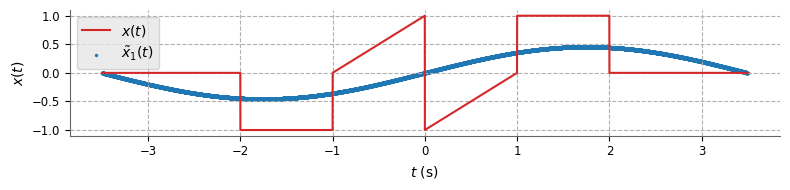

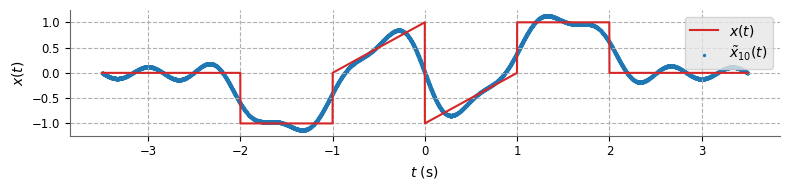

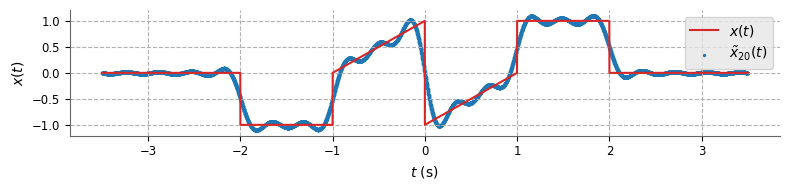

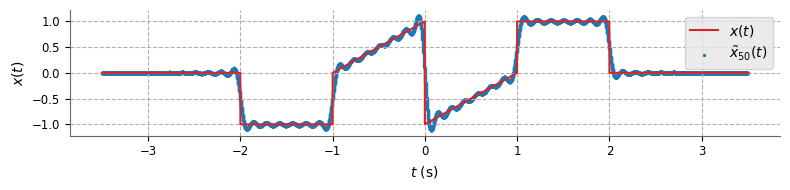

In [4]:
def plot(x_N, N):
    plt.plot(t, x_t, color='tab:red', label=r'$x(t)$')
    plt.scatter(x=t, y=x_N.real, s=2, color='tab:blue', label=rf'$\tilde{{x}}_{{{N}}} (t)$')
    plt.xlabel(r'$t$ (s)')
    plt.ylabel(r'$x(t)$')
    plt.grid(True)
    plt.legend()
    plt.show()

plot(x_1, 1)     # N = 1
plot(x_10, 10)   # N = 10
plot(x_20, 20)   # N = 20
plot(x_50, 50)   # N = 50

Item c) Potência média $P_N$ do erro $(x(t) - \tilde{x}_{N} (t))^2$.

In [5]:
def pot(x_original, x_fourier):
    err = (x_original - x_fourier)**2
    return np.mean(err) # Aproximação discreta da integral

P_1 = pot(x_t, x_1)
P_10 = pot(x_t, x_10)
P_20 = pot(x_t, x_20)
P_50 = pot(x_t, x_50)

print(f'Potência média do erro para N = 1: {P_1}')
print(f'Potência média do erro para N = 10: {P_10}')
print(f'Potência média do erro para N = 20: {P_20}')
print(f'Potência média do erro para N = 50: {P_50}')

Potência média do erro para N = 1: (0.2767653611529634+0j)
Potência média do erro para N = 10: (0.04037836598957219-7.69955352444065e-20j)
Potência média do erro para N = 20: (0.019391980399077604-5.604020146655687e-20j)
Potência média do erro para N = 50: (0.008216140378160625-2.758788135161333e-20j)


Item d) Representação gráfica do módulo dos coeficientes $a_k$ em função de $\omega = k \omega_0$, para $N=50$.

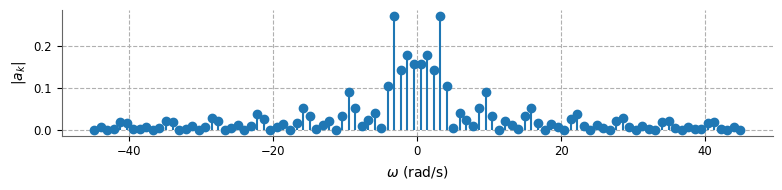

In [6]:
N = 50
k = np.linspace(-N, N, 2*N)
omega = k * omega_0
a_k = (1/T)*(-2j*(np.sin(omega) + omega*np.cos(omega)*(1 - 2*np.cos(omega)))) / (omega)**2
a_k = np.abs(a_k)

plt.stem(omega, a_k, basefmt=" ")
plt.xlabel(r'$\omega$ (rad/s)')
plt.ylabel(r'$|a_k|$')
plt.grid(True)
plt.show()

Item e) Gráfico da resposta em frequência $H(j\omega$) do circuito analógico fornecido.

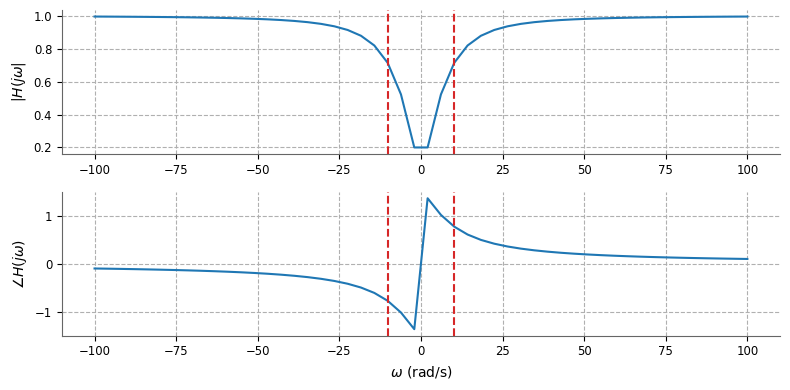

In [7]:
# Valores RC
R = 100_000 # 100 kΩ
C = 1e-6    # 1 μF

# Frequência de corte
omega_c = 1 / (R * C)

# Resposta em frequência do filtro
def Hjw(omega):
    return 1 / (1 - 1j * (omega_c / omega))

omega = np.linspace(-100, 100)

# Módulo e fase de H(jw)
mod_H = np.abs(Hjw(omega))
angle_H = np.angle(Hjw(omega))

plt.figure(figsize=(8, 4))
# Módulo da Resposta em Frequência: |H(jw)|
plt.subplot(2, 1, 1)
plt.plot(omega, mod_H)
plt.ylabel(r'$|H(j\omega|$')
plt.grid(True)
plt.axvline(x = omega_c, color = 'tab:red', ls = '--')
plt.axvline(x =-omega_c, color = 'tab:red', ls = '--')

# Fase da Resposta em Frequência: ∠H(jw)
plt.subplot(2, 1, 2)
plt.plot(omega, angle_H)
plt.ylabel(r'$\angle H(j\omega)$')
plt.grid(True)
plt.axvline(x = omega_c, color = 'tab:red', ls = '--')
plt.axvline(x =-omega_c, color = 'tab:red', ls = '--')

plt.xlabel(r'$\omega$ (rad/s)')
plt.show()

Item f) Gráfico da saída $y(t)$ a partir da entrada aproximada $\tilde{x}_{N} (t)$, para $N = 50$.

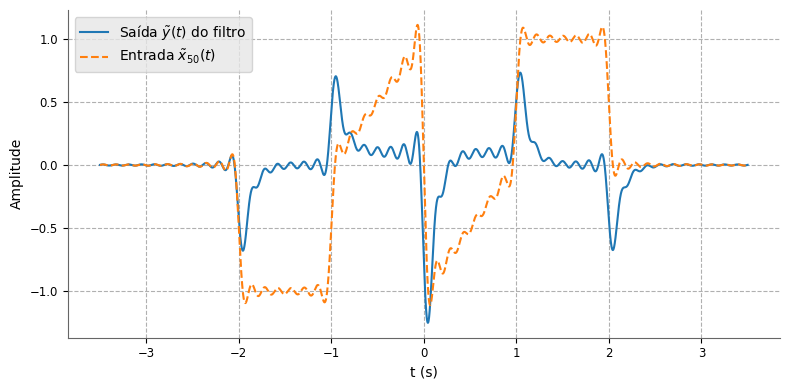

In [8]:
def y_output(N):
    y = 0
    for k in range(-N, N+1):
        omega = k * omega_0
        if k == 0:
            a_k = a_0
            H_k = 0
        else:
            a_k = (1/T)*(-2j*(np.sin(omega) + omega*np.cos(omega)*(1 - 2*np.cos(omega)))) / (omega)**2
            H_k = Hjw(omega)  # Aplicando H(jw) para cada k
        y += a_k*H_k*np.exp(1j*omega*t)
    return y

y_t = y_output(N)

plt.figure(figsize=(8, 4))
plt.plot(t, y_t.real, label=r'Saída $\tilde{y}(t)$ do filtro')
plt.plot(t, x_50.real, label=r'Entrada $\tilde{x}_{50} (t)$', ls = '--')
plt.xlabel('t (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()